In [1]:
import numpy as np
import pandas as pd

In [2]:
initialData = pd.read_csv(r"C:\Users\Eric\Documents\EECS 731\Proj6\Data\artificialWithAnomaly\artificialWithAnomaly\art_daily_jumpsup.csv")
initialData

,timestamp,value
0,2014-04-01 00:00:00,19.761252
1,2014-04-01 00:05:00,20.500833
2,2014-04-01 00:10:00,19.961641
3,2014-04-01 00:15:00,21.490266
4,2014-04-01 00:20:00,20.187739
...,...,...
4027,2014-04-14 23:35:00,18.074649
4028,2014-04-14 23:40:00,21.002014
4029,2014-04-14 23:45:00,20.566713
4030,2014-04-14 23:50:00,18.254193


In [3]:
initialData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4032 entries, 0 to 4031
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   timestamp  4032 non-null   object 
 1   value      4032 non-null   float64
dtypes: float64(1), object(1)
memory usage: 63.1+ KB


In [4]:
#Change timestamp from object to datetime
#initialData['timestamp'] = pd.to_datetime(initialData['timestamp'], errors='coerce')

In [5]:
initialData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4032 entries, 0 to 4031
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   timestamp  4032 non-null   object 
 1   value      4032 non-null   float64
dtypes: float64(1), object(1)
memory usage: 63.1+ KB


In [18]:
initialData['timestamp'] = pd.to_datetime(initialData['timestamp'])

In [19]:
initialData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4032 entries, 0 to 4031
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   timestamp  4032 non-null   datetime64[ns]
 1   value      4032 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 63.1 KB


In [20]:
initialData

,timestamp,value
0,2014-04-01 00:00:00,19.761252
1,2014-04-01 00:05:00,20.500833
2,2014-04-01 00:10:00,19.961641
3,2014-04-01 00:15:00,21.490266
4,2014-04-01 00:20:00,20.187739
...,...,...
4027,2014-04-14 23:35:00,18.074649
4028,2014-04-14 23:40:00,21.002014
4029,2014-04-14 23:45:00,20.566713
4030,2014-04-14 23:50:00,18.254193


In [16]:
#initialData['timestamp'] = initialData['timestamp'].values.astype(float)
initialData

ValueError: could not convert string to float: '2014-04-01 00:00:00'

In [10]:
initialData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4032 entries, 0 to 4031
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   timestamp  4032 non-null   object 
 1   value      4032 non-null   float64
dtypes: float64(1), object(1)
memory usage: 63.1+ KB


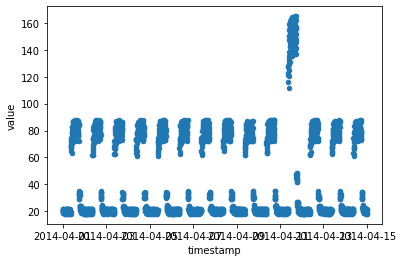

In [21]:
initialData.plot.scatter(x='timestamp', y='value')

In [22]:
#Building a naive bayes Gaussian model
#Using: https://heartbeat.fritz.ai/naive-bayes-classifier-in-python-using-scikit-learn-13c4deb83bcf
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

In [26]:
#Data pre-processing
#We’re going to predict y using x as an independent variable.
#Note that the test size of 0.25 indicates we’ve used 25% of the data for testing. 
#random_state ensures reproducibility
x = initialData.drop('timestamp',axis=1)
y = initialData['timestamp']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42)

In [27]:
x

,value
0,19.761252
1,20.500833
2,19.961641
3,21.490266
4,20.187739
...,...
4027,18.074649
4028,21.002014
4029,20.566713
4030,18.254193


In [28]:
#Train the model
model = GaussianNB()
model.fit(x_train, y_train)

GaussianNB()

In [29]:
y_pred = model.predict(x_test)
y_pred

array(['2014-04-09T08:05:00.000000000', '2014-04-03T07:40:00.000000000',
       '2014-04-10T04:45:00.000000000', ...,
       '2014-04-10T08:05:00.000000000', '2014-04-10T01:45:00.000000000',
       '2014-04-13T07:35:00.000000000'], dtype='datetime64[ns]')

In [30]:
accuracy = accuracy_score(y_test, y_pred)*100
accuracy

0.0